# Lien vers le jeu de données 
https://www.kaggle.com/datasets/siamaktahmasbi/insights-into-sleep-patterns-and-daily-habits

# Les imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du jeu de données

In [2]:
df = pd.read_csv('sleep_health_lifestyle_dataset.csv')

# Consultation et nettoyage

In [3]:
df.isnull().sum()

Person ID                                  0
Gender                                     0
Age                                        0
Occupation                                 0
Sleep Duration (hours)                     0
Quality of Sleep (scale: 1-10)             0
Physical Activity Level (minutes/day)      0
Stress Level (scale: 1-10)                 0
BMI Category                               0
Blood Pressure (systolic/diastolic)        0
Heart Rate (bpm)                           0
Daily Steps                                0
Sleep Disorder                           290
dtype: int64

In [4]:
df.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN


#### Nettoyage

In [5]:
df.fillna(value='Aucun trouble du sommeil', inplace=True)

In [6]:
# Diviser 'Blood Pressure' en systolique et diastolique
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure (systolic/diastolic)'].str.split('/', expand=True).astype(int)
df.drop('Blood Pressure (systolic/diastolic)', axis=1, inplace=True)


#### Types de données des colonnes

In [7]:
# Obtenir la liste des noms de colonnes
colonnes = df.columns.tolist()

# Obtenir la liste des types de données
types = df.dtypes.tolist()

# Afficher chaque nom de colonne avec son type de données correspondant
for col, dtype in zip(colonnes, types):
    print(f"{col} - {dtype}")

Person ID - int64
Gender - object
Age - int64
Occupation - object
Sleep Duration (hours) - float64
Quality of Sleep (scale: 1-10) - float64
Physical Activity Level (minutes/day) - int64
Stress Level (scale: 1-10) - int64
BMI Category - object
Heart Rate (bpm) - int64
Daily Steps - int64
Sleep Disorder - object
Systolic BP - int64
Diastolic BP - int64


#### Affichage des valeurs uniques pour les colonnes de type objet

In [8]:
for nom_col, serie_col in df.items():
    if pd.api.types.is_object_dtype(serie_col):
        print ('##############################')
        print(f"Colonne: {nom_col}")
        if len(serie_col.unique()) < 10:
            for valeur in serie_col.unique():
                count = len(df[df[nom_col] == valeur])
                print(f"  Valeur: {valeur}, Compte: {count}")
            print(f"  Type: {serie_col.dtype}") 

        else:
            print('  Nombre de valeurs uniques dans la colonne', nom_col, 'est', len(serie_col.unique()))
            print(f"  Type: {serie_col.dtype}")  

##############################
Colonne: Gender
  Valeur: Male, Compte: 199
  Valeur: Female, Compte: 201
  Type: object
##############################
Colonne: Occupation
  Valeur: Manual Labor, Compte: 96
  Valeur: Retired, Compte: 95
  Valeur: Office Worker, Compte: 99
  Valeur: Student, Compte: 110
  Type: object
##############################
Colonne: BMI Category
  Valeur: Obese, Compte: 98
  Valeur: Underweight, Compte: 102
  Valeur: Overweight, Compte: 109
  Valeur: Normal, Compte: 91
  Type: object
##############################
Colonne: Sleep Disorder
  Valeur: Aucun trouble du sommeil, Compte: 290
  Valeur: Insomnia, Compte: 79
  Valeur: Sleep Apnea, Compte: 31
  Type: object


# Graphiques 
#### Distribution de 'Age'

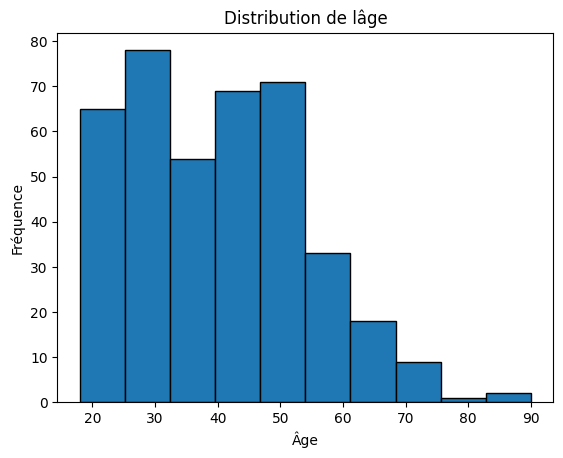

In [9]:
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Distribution de l''âge')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

#### Diagramme en boîte de 'Sleep Duration' par 'Gender'


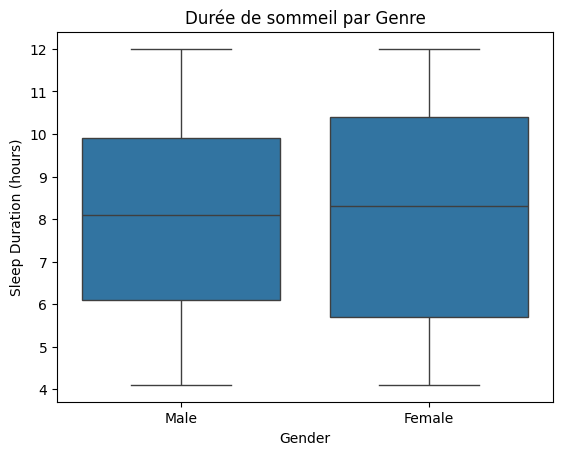

In [10]:
sns.boxplot(x='Gender', y='Sleep Duration (hours)', data=df)
plt.title('Durée de sommeil par Genre')
plt.show()

#### Matrice de corrélation pour les variables numériques

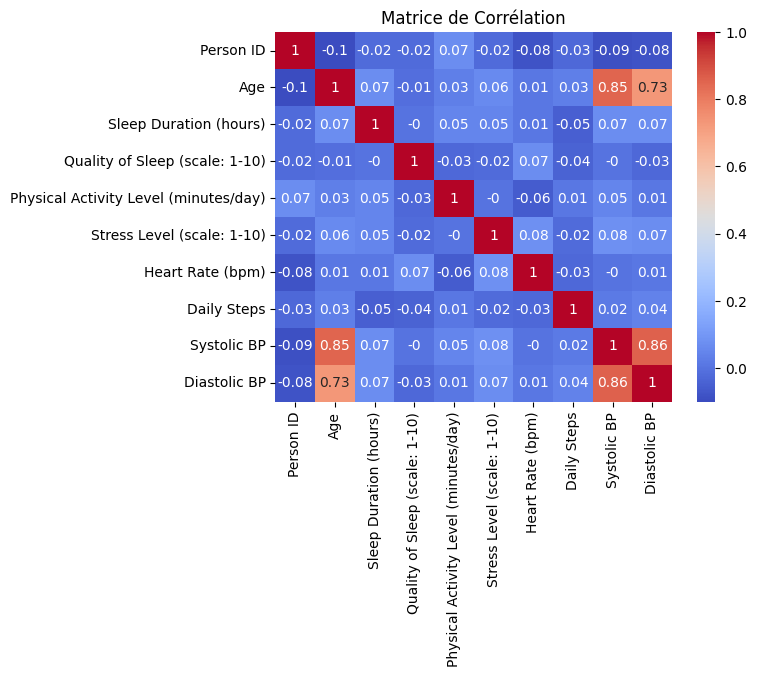

In [11]:
# Statistiques descriptives pour les colonnes numériques
colonnes_num = df.select_dtypes(include=['int64', 'float64']).columns
# Matrice de corrélation pour les variables numériques
corr = df[colonnes_num].corr().round(2)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

#### Diagramme en barres de la distribution des 'Sleep Disorder'

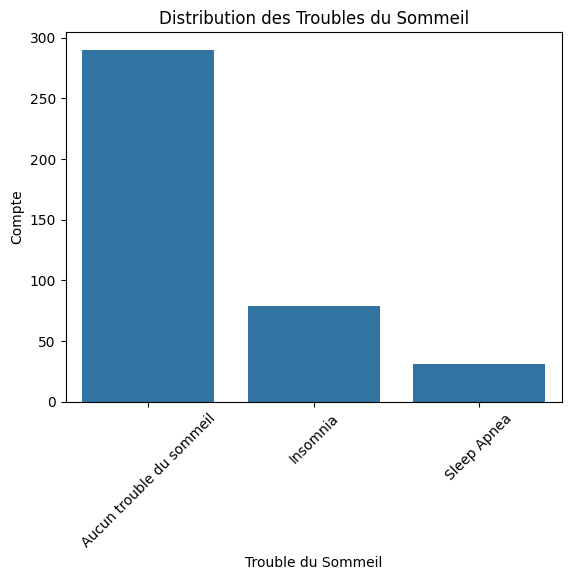

In [12]:
sns.countplot(x='Sleep Disorder', data=df, order=df['Sleep Disorder'].value_counts().index)
plt.title('Distribution des Troubles du Sommeil')
plt.xlabel('Trouble du Sommeil')
plt.ylabel('Compte')
plt.xticks(rotation=45)
plt.show()

#### Comparer 'Quality of Sleep' selon 'BMI Category'

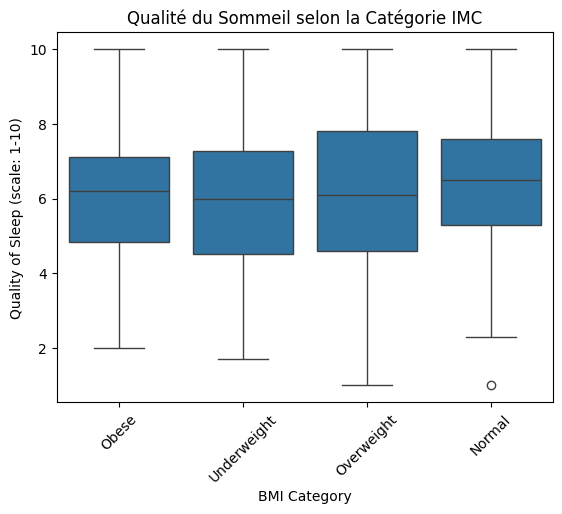

In [13]:
sns.boxplot(x='BMI Category', y='Quality of Sleep (scale: 1-10)', data=df)
plt.title('Qualité du Sommeil selon la Catégorie IMC')
plt.xticks(rotation=45)
plt.show()

#### Niveau de 'Stress Level' moyen selon 'Occupation'

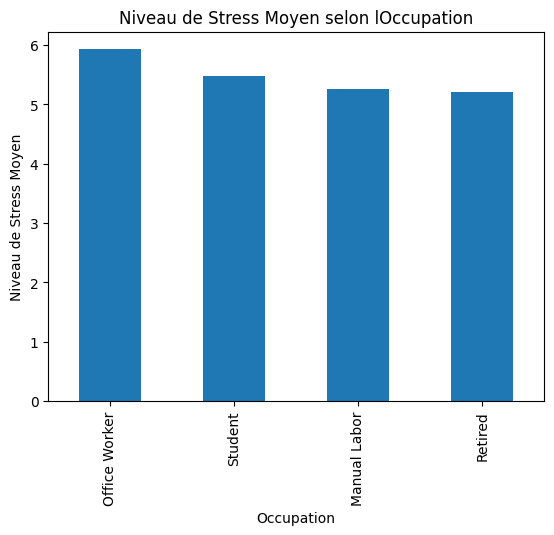

In [14]:
niveau_stress_moyen = df.groupby('Occupation')['Stress Level (scale: 1-10)'].mean().sort_values(ascending=False)
niveau_stress_moyen.plot(kind='bar')
plt.title('Niveau de Stress Moyen selon l''Occupation')
plt.xlabel('Occupation')
plt.ylabel('Niveau de Stress Moyen')
plt.show()